## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


## Dataset Loading

In [2]:
df = pd.read_csv(r'D:\Project Phase II\Dataset\completedataset.csv',encoding='cp1252')
df

C:\Users\sathi\AppData\Local\Temp\ipykernel_18356\870708999.py:1: DtypeWarning: Columns (1,3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Project Phase II\Dataset\completedataset.csv',encoding='cp1252')


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2,5,1,1,2,NaN,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [3]:
df.head(1)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2,5,1,1,2,NaN,0


## Normie EDA

Find out unique values

In [ ]:
#Finding out unique values in each column 
for col in df.columns:
    print(col, df[col].nunique())

srcip 43
sport 107594
dstip 47
dsport 128286
proto 135
state 16
dur 587303
sbytes 14155
dbytes 19166
sttl 13
dttl 11
sloss 544
dloss 707
service 13
Sload 1100258
Dload 1173739
Spkts 933
Dpkts 1255
swin 36
dwin 32
stcpb 1429571
dtcpb 1429031
smeansz 1415
dmeansz 1417
trans_depth 14
res_bdy_len 2907
Sjit 1381001
Djit 1424689
Stime 85348
Ltime 85361
Sintpkt 975275
Dintpkt 960353
tcprtt 76931
synack 66997
ackdat 60844
is_sm_ips_ports 2
ct_state_ttl 7
ct_flw_http_mthd 16
is_ftp_login 4
ct_ftp_cmd 14
ct_srv_src 65
ct_srv_dst 66
ct_dst_ltm 62
ct_src_ ltm 62
ct_src_dport_ltm 62
ct_dst_sport_ltm 55
ct_dst_src_ltm 65
attack_cat 13
Label 2


In [ ]:
#Finding out highly correlated features
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper


C:\Users\sathi\AppData\Local\Temp\ipykernel_9980\2254682018.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
dur,NaN,0.033269,0.086971,0.003653,0.010708,0.041493,0.087713,0.014715,0.022502,0.088082,...,0.012200,0.006280,0.019276,0.018429,0.013797,0.015871,0.013103,0.011308,0.016087,0.001959
sbytes,NaN,NaN,0.047027,0.008925,0.066423,0.953492,0.051183,0.020990,0.006786,0.602840,...,0.009958,0.010147,0.035114,0.035152,0.027993,0.027649,0.027929,0.028033,0.031104,0.010180
dbytes,NaN,NaN,NaN,0.094181,0.009123,0.115536,0.991342,0.069986,0.083811,0.727075,...,0.074276,0.047192,0.051501,0.051996,0.060283,0.065256,0.066204,0.072021,0.079876,0.075543
sttl,NaN,NaN,NaN,NaN,0.113982,0.069436,0.118656,0.280077,0.246821,0.150796,...,0.034540,0.009498,0.455537,0.458093,0.394223,0.395481,0.456672,0.478093,0.513654,0.904393
dttl,NaN,NaN,NaN,NaN,NaN,0.076686,0.013923,0.219185,0.022067,0.046316,...,0.150006,0.067357,0.301396,0.308916,0.287295,0.278726,0.274834,0.287738,0.290141,0.134947
sloss,NaN,NaN,NaN,NaN,NaN,NaN,0.153328,0.068925,0.046725,0.725512,...,0.056225,0.056048,0.081497,0.083005,0.079277,0.079066,0.085481,0.087456,0.094245,0.043272
dloss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088843,0.108836,0.766469,...,0.059379,0.019031,0.073004,0.074366,0.081891,0.086322,0.090517,0.096435,0.106149,0.095855
Sload,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174604,0.125043,...,0.027776,0.019000,0.473018,0.478605,0.428315,0.418721,0.473234,0.489022,0.512990,0.192278
Dload,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167086,...,0.159380,0.120359,0.148099,0.172706,0.216306,0.194039,0.234258,0.235888,0.254661,0.219710
Spkts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000293,0.025125,0.121033,0.125291,0.130873,0.132029,0.143064,0.147655,0.162039,0.120880


In [6]:
#finding number of records where sport is same as dsport
len(df[df['sport'] == df['dsport']])




12340

In [7]:
#Finding number of records where sport is not the same as dsport
len(df[df['sport'] != df['dsport']])


2527707

In [11]:

point_biserial_corr = df['Label'].corr(pd.factorize(df['sport'])[0])

print("Point-biserial correlation between 'sport' and 'Label':", point_biserial_corr)


TypeError: unsupported type: <class 'numpy.ndarray'>

In [12]:
sport_label_counts = df.groupby(['sport', 'Label']).size().unstack(fill_value=0)
print("\nUnivariate Analysis:")
print(sport_label_counts)


Univariate Analysis:
Label      0      1
sport              
0      13991  35893
19         1      0
21       103      0
22        78      0
25       130      0
...      ...    ...
9993       1      0
9994       2      0
9995       2      1
9997       2      0
9998       1      0

[107594 rows x 2 columns]


In [13]:
# Information Gain
# Convert categorical variables to numerical using factorize, and then compute mutual information
from sklearn.feature_selection import mutual_info_classif
numerical_sport, _ = pd.factorize(df['sport'])
information_gain = mutual_info_classif(numerical_sport.reshape(-1, 1), df['Label'])[0]

print("\nInformation Gain between 'sport' and 'Label':", information_gain)


Information Gain between 'sport' and 'Label': 0.1347478460034155


In [14]:
numerical_dsport, _ = pd.factorize(df['dsport'])
information_gain_dsport = mutual_info_classif(numerical_dsport.reshape(-1, 1), df['Label'])[0]

print("\nInformation Gain between 'dsport' and 'Label':", information_gain_dsport)


Information Gain between 'dsport' and 'Label': 0.15078375589743853


In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.linear_model import Lasso

x = df.drop(['Label','srcip','dstip'], axis=1)
y = df['Label']
# Train Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(x, y)

# Get Lasso coefficients
lasso_coef = lasso.coef_

print("Lasso regression coefficient of the 'sport' feature:", lasso_coef)


ValueError: could not convert string to float: '0x000b'

In [ ]:
#Finding total number of unique srcip and dstip
print("Total number of unique srcip: ",df['srcip'].nunique())
print("Total number of unique dstip: ",df['dstip'].nunique())
#print("Total number of unique srcport: ",len(df['sport'].unique()))
#print("Total number of unique dstport: ",df['dsport'].nunique())
#List of srcip and dstip
x = set(df['srcip'].unique())
y = set(df['dstip'].unique())
print("Total number of unique ips:",len(x.union(y)))
print("Total number of unique ips repeating in both srcip and dstip:",len(x.intersection(y)))
print("Total number of unique ips not repeating in dstip but present in srcip:",len(x.difference(y)))
print("Total number of unique ips not repeating in srcip but present in dstip:",len(y.difference(x)))

Total number of unique srcip:  43
Total number of unique dstip:  47
Total number of unique srcport:  107594
Total number of unique dstport:  128286
Total number of unique ips: 49
Total number of unique ips repeating in both srcip and dstip: 41
Total number of unique ips not repeating in dstip but present in srcip: 2
Total number of unique ips not repeating in srcip but present in dstip: 6


is_sm_ips_ports field denotes if the ip and the port of source and destination is the same

In [ ]:
# Finding count of df[is_sm_ips_ports] = 1
df[df['is_sm_ips_ports']==1 ].count()

srcip               4195
sport               4195
dstip               4195
dsport              4195
proto               4195
state               4195
dur                 4195
sbytes              4195
dbytes              4195
sttl                4195
dttl                4195
sloss               4195
dloss               4195
service             4195
Sload               4195
Dload               4195
Spkts               4195
Dpkts               4195
swin                4195
dwin                4195
stcpb               4195
dtcpb               4195
smeansz             4195
dmeansz             4195
trans_depth         4195
res_bdy_len         4195
Sjit                4195
Djit                4195
Stime               4195
Ltime               4195
Sintpkt             4195
Dintpkt             4195
tcprtt              4195
synack              4195
ackdat              4195
is_sm_ips_ports     4195
ct_state_ttl        4195
ct_flw_http_mthd    2805
is_ftp_login        2805
ct_ftp_cmd          4195


In [ ]:
# Finding count of df[is_sm_ips_ports] = 1 and df[Label] = 1
df[(df['is_sm_ips_ports']==1) & (df['Label']==1)].count()

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_spo

There is no attack when source and destination ip and port is same. So it is safe to drop these records and also to completely drop this field

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 51 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

Service - High level protocol like HTTP, FTP

Proto - Low level protocol like HTTP uses TCP, FTP uses TCP (the underlying protocol)

In [ ]:
#List of unique proto values
df.proto.unique()

array(['tcp', 'udp', 'icmp', 'arp', 'ospf', 'udt', 'sctp', 'igmp', 'gre',
       'sep', 'swipe', 'mobile', 'sun-nd', 'pim', 'rtp', 'ip', 'ggp',
       'ipnip', 'st2', 'cbt', 'argus', 'bbn-rcc', 'chaos', 'egp', 'emcon',
       'igp', 'nvp', 'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1',
       'trunk-2', 'xns-idp', 'irtp', 'leaf-1', 'leaf-2', 'rdp', 'iso-tp4',
       'netblt', 'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp',
       'idpr-cmtp', 'tp++', 'il', 'ipv6', 'ipv6-route', 'sdrp',
       'ipv6-frag', 'idrp', 'rsvp', 'bna', 'mhrp', 'i-nlsp', 'narp',
       'tlsp', 'skip', 'ipv6-no', 'ipv6-opts', 'any', 'cftp', 'sat-expak',
       'kryptolan', 'ippc', 'rvd', 'sat-mon', 'cpnx', 'ipcv', 'visa',
       'cphb', 'wsn', 'br-sat-mon', 'pvp', 'wb-mon', 'iso-ip', 'wb-expak',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'larp', 'sprite-rpc', 'ax.25', 'ipip', 'mtp',
       'aes-sp3-d', 'etherip', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp

In [ ]:
len(df.proto.unique())

135

In [ ]:
df.service.unique()

In [ ]:
len(df.service.unique())

In [ ]:
#Drop records with is_sm_ips_ports = 1
df = df.drop(df[df['is_sm_ips_ports']==1].index)

In [ ]:
df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2,5,1,1,2,NaN,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


Finding out how many unique edges are present

In [ ]:
#Drop srcip, dstip,sport, dport, Stime, Ltime, is_sm_ips_ports
dfEdge = df.drop(['srcip','dstip','sport','dsport','Stime','Ltime','is_sm_ips_ports'],axis=1)

In [ ]:
#Find the number of redundant records in dfEdge
dfEdge.duplicated().sum()


509205

## Observing values for each attribute

In [16]:
#List all columns in df 
df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [19]:
#Unique values in each column except srcip, dstip,sport, dport, Stime, Ltime, is_sm_ips_ports, Label, attack_cat
for col in df.columns:
    print()
    print(col, df[col].nunique())
    print(col, df[col].unique())



srcip 42
srcip ['59.166.0.1' '59.166.0.3' '59.166.0.8' '149.171.126.18' '175.45.176.0'
 '59.166.0.7' '59.166.0.6' '175.45.176.1' '59.166.0.4' '59.166.0.2'
 '59.166.0.5' '59.166.0.9' '175.45.176.2' '59.166.0.0' '175.45.176.3'
 '10.40.85.10' '10.40.85.30' '10.40.85.1' '149.171.126.12' '10.40.182.1'
 '10.40.182.6' '149.171.126.13' '149.171.126.4' '149.171.126.1'
 '149.171.126.15' '10.40.182.3' '149.171.126.17' '149.171.126.11'
 '149.171.126.6' '149.171.126.10' '149.171.126.0' '149.171.126.3'
 '149.171.126.16' '149.171.126.19' '149.171.126.14' '149.171.126.9'
 '149.171.126.5' '149.171.126.8' '149.171.126.7' '149.171.126.2'
 '192.168.241.243' '127.0.0.1']

sport 107594
sport [18247 54771 13289 ... 533 933 706]

dstip 46
dstip ['149.171.126.4' '149.171.126.2' '149.171.126.9' '175.45.176.3'
 '149.171.126.0' '149.171.126.12' '149.171.126.7' '149.171.126.5'
 '149.171.126.3' '149.171.126.10' '149.171.126.15' '149.171.126.1'
 '149.171.126.6' '149.171.126.8' '149.171.126.16' '149.171.126.14'
 '19

In [3]:
#Checking if port numbers have any relationship with Label
df.groupby(['Label','sport']).size()


Label  sport
0      0        13991
       19           1
       21         103
       22          78
       25         130
                ...  
1      9909         1
       9949         1
       9953         1
       9984         1
       9995         1
Length: 149204, dtype: int64

In [ ]:
df.groupby(['Label','dsport']).size()

## Create Complete Source Address and Destination Address

Field src = srcIP : Port

In [16]:
df['src'] = df['srcip']+':'+df['sport'].astype(str)

C:\Users\sathi\AppData\Local\Temp\ipykernel_4824\1650916124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['src'] = df['srcip']+':'+df['sport'].astype(str)


In [17]:
df['src']

0             59.166.0.1:18247
1             59.166.0.3:54771
2             59.166.0.8:13289
3          149.171.126.18:1043
4          149.171.126.18:1043
                  ...         
2540042       59.166.0.5:33094
2540043       59.166.0.7:20848
2540044       59.166.0.3:21511
2540045       59.166.0.9:35433
2540046     175.45.176.0:17293
Name: src, Length: 2535852, dtype: object

Number of unique sourceIP:port

In [ ]:
len(df['src'].unique())

692920

Number of unique sourceIP

In [ ]:
len(df['srcip'].unique())

43

Number of unique source Ports

In [ ]:
len(df['sport'].unique())

107594

Field dst = dstIP : dsport

In [18]:
df['dst'] = df['dstip']+':'+df['dsport'].astype(str)

C:\Users\sathi\AppData\Local\Temp\ipykernel_4824\1013410360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dst'] = df['dstip']+':'+df['dsport'].astype(str)


Number of unique destinationIP:port

In [19]:
len(df['dst'].unique())

423196

Number of unique destinationIP

In [ ]:
len(df['dstip'].unique())

Number of unique destination Ports

In [ ]:
len(df['dsport'].unique())

Number of sourceIPs that are destinationIPs and viceversa

In [ ]:
#Finding number of common src and dst ip addresses
len(set(df['srcip'].unique()).intersection(set(df['dstip'].unique())))


Number of srcIP:port that are dstIP:port and vice versa

In [ ]:
len(set(df['src'].unique()).intersection(set(df['dst'].unique())))

In [ ]:
df.describe()

Null Value Fields

In [ ]:
x = df.isnull().sum()
for i in x.keys():
    if x[i]>0:
        print(i, x[i])

ct_flw_http_mthd 1348145
is_ftp_login 1429879
attack_cat 2218764


Correlation between variables

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

                       dur    sbytes    dbytes      sttl      dttl     sloss  \
dur               1.000000  0.033269  0.086971 -0.003653  0.010708  0.041493   
sbytes            0.033269  1.000000  0.047027 -0.008925  0.066423  0.953492   
dbytes            0.086971  0.047027  1.000000 -0.094181  0.009123  0.115536   
sttl             -0.003653 -0.008925 -0.094181  1.000000  0.113982 -0.069436   
dttl              0.010708  0.066423  0.009123  0.113982  1.000000  0.076686   
sloss             0.041493  0.953492  0.115536 -0.069436  0.076686  1.000000   
dloss             0.087713  0.051183  0.991342 -0.118656  0.013923  0.153328   
Sload            -0.014715 -0.020990 -0.069986  0.280077 -0.219185 -0.068925   
Dload            -0.022502 -0.006786  0.083811 -0.246821 -0.022067  0.046725   
Spkts             0.088082  0.602840  0.727075 -0.150796  0.046316  0.725512   
Dpkts             0.089368  0.109749  0.970808 -0.141729  0.019952  0.237363   
swin              0.011126  0.059779  0.

In [ ]:
#Correlation with Label
correlation_matrix['Label'].sort_values(ascending=False)

Label               1.000000
sttl                0.904393
ct_state_ttl        0.873694
ct_dst_src_ltm      0.439916
ct_dst_sport_ltm    0.419056
ct_src_dport_ltm    0.396749
ct_srv_dst          0.386509
ct_srv_src          0.383007
ct_src_ ltm         0.343246
ct_dst_ltm          0.339464
Ltime               0.275660
Stime               0.275660
Sload               0.192278
ackdat              0.143443
tcprtt              0.143109
dttl                0.134947
synack              0.122253
ct_flw_http_mthd    0.083188
is_ftp_login        0.031956
Sjit                0.020959
sbytes              0.010180
dur                 0.001959
Dintpkt            -0.010632
is_sm_ips_ports    -0.015477
Sintpkt            -0.019034
res_bdy_len        -0.027339
trans_depth        -0.029041
sloss              -0.043272
Djit               -0.054420
smeansz            -0.065363
dbytes             -0.075543
dloss              -0.095855
Dpkts              -0.115947
Spkts              -0.120880
Dload         

In [ ]:
#Finding Not a number values in the dataset
df.isna().sum()

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

## Adjust the timestamp values to user readable format

In [ ]:
df['Stime']

Convert the Unix TimeStamp into interpretable timestamps in Stime and Ltime

In [4]:
df['StimeTimeStamp'] = pd.to_datetime(df['Stime'], unit='s')
df['StimeTimeStamp']

0         2015-02-18 03:45:29
1         2015-02-18 03:45:29
2         2015-02-18 03:45:29
3         2015-02-18 03:45:29
4         2015-02-18 03:45:29
                  ...        
2540042   2015-02-18 12:21:08
2540043   2015-02-18 12:21:08
2540044   2015-02-18 12:21:02
2540045   2015-02-18 12:21:07
2540046   2015-02-18 12:21:08
Name: StimeTimeStamp, Length: 2540047, dtype: datetime64[ns]

In [5]:
df['LtimeTimeStamp'] = pd.to_datetime(df['Ltime'], unit='s')
df['LtimeTimeStamp']

0         2015-02-18 03:45:29
1         2015-02-18 03:45:29
2         2015-02-18 03:45:29
3         2015-02-18 03:45:29
4         2015-02-18 03:45:29
                  ...        
2540042   2015-02-18 12:21:09
2540043   2015-02-18 12:21:09
2540044   2015-02-18 12:21:09
2540045   2015-02-18 12:21:09
2540046   2015-02-18 12:21:09
Name: LtimeTimeStamp, Length: 2540047, dtype: datetime64[ns]

In [6]:
len(df['StimeTimeStamp'].unique())

85348

In [7]:
len(df['LtimeTimeStamp'].unique())

85361

In [8]:
# Number of years in the dataset
len(df['StimeTimeStamp'].dt.year.unique())

1

In [9]:
#number of months in the dataset    
len(df['StimeTimeStamp'].dt.month.unique())

2

In [13]:
df['StimeTimeStamp'].dt.month.unique()

array([2, 1], dtype=int64)

In [10]:
#number of days in the dataset
len(df['StimeTimeStamp'].dt.day.unique())

3

In [14]:
df['StimeTimeStamp'].dt.day.unique()

array([18, 22, 23], dtype=int64)

In [ ]:
#Checking for outliers in the dataset in the numerical columns
df.describe()



,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,...,1.191902e+06,1.110168e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06,3.328884e+01,...,2.345856e-01,3.969940e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06,7.628388e+01,...,7.940924e-01,1.996589e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [ ]:
#Relationship between outliers and Label
df[df['Label']==1].describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,321283.000000,3.212830e+05,3.212830e+05,321283.000000,321283.000000,321283.000000,321283.000000,3.212830e+05,3.212830e+05,321283.000000,...,38344.000000,24100.000000,321283.000000,321283.000000,321283.000000,321283.000000,321283.000000,321283.000000,321283.000000,321283.0
mean,0.730478,5.848632e+03,4.446659e+03,240.135647,45.963020,2.603390,2.073325,9.688622e+07,1.150953e+04,9.056246,...,0.596912,0.082531,20.114295,19.981509,13.720321,14.302142,13.481059,10.392299,19.861163,1.0
std,4.866499,1.560724e+05,1.143092e+05,49.881312,97.112593,58.824847,42.552595,1.552429e+08,9.184270e+04,118.843071,...,1.605774,0.290437,14.896203,15.011186,11.984442,11.889193,12.008143,8.198317,15.195177,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,0.000005,1.140000e+02,0.000000e+00,254.000000,0.000000,0.000000,0.000000,4.560000e+07,0.000000e+00,2.000000,...,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,2.000000,1.000000,4.000000,1.0
50%,0.000009,1.140000e+02,0.000000e+00,254.000000,0.000000,0.000000,0.000000,5.700000e+07,0.000000e+00,2.000000,...,0.000000,0.000000,20.000000,20.000000,13.000000,14.000000,13.000000,10.000000,20.000000,1.0
75%,0.000010,2.000000e+02,0.000000e+00,254.000000,0.000000,0.000000,0.000000,1.140000e+08,0.000000e+00,2.000000,...,1.000000,0.000000,33.000000,33.000000,20.000000,21.000000,20.000000,17.000000,33.000000,1.0
max,59.999527,1.435577e+07,1.465753e+07,255.000000,253.000000,5319.000000,5507.000000,5.988000e+09,2.447663e+06,10646.000000,...,30.000000,4.000000,67.000000,67.000000,67.000000,67.000000,67.000000,38.000000,67.000000,1.0


In [ ]:
#Relationship between outliers and Label
df[df['Label']==0].describe()


,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,...,1.153558e+06,1.086068e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2.218764e+06,2218764.0
mean,6.484112e-01,4.121088e+03,4.105852e+04,3.710069e+01,2.856636e+01,5.534693e+00,1.839377e+01,2.827846e+07,2.804086e+06,3.679779e+01,...,2.225419e-01,3.874895e-02,7.627581e+00,7.397207e+00,5.384763e+00,5.829279e+00,3.362240e+00,2.608133e+00,4.961239e+00,0.0
std,1.478348e+01,1.071400e+04,1.662775e+05,2.829149e+01,2.642338e+01,8.847657e+00,5.805924e+01,1.096301e+08,4.409817e+06,6.722639e+01,...,7.492179e-01,1.970657e-01,9.087762e+00,9.023650e+00,6.832230e+00,6.893689e+00,6.960266e+00,5.123225e+00,9.142620e+00,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0
25%,1.111000e-03,2.640000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.164533e+05,6.873291e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0
50%,2.004600e-02,1.684000e+03,2.478000e+03,3.100000e+01,2.900000e+01,4.000000e+00,5.000000e+00,5.593869e+05,6.565350e+05,1.400000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.0
75%,2.235170e-01,3.614000e+03,1.723800e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.500000e+01,1.453132e+06,3.696087e+06,4.800000e+01,...,0.000000e+00,0.000000e+00,9.000000e+00,8.000000e+00,5.000000e+00,6.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,0.0
max,8.786638e+03,1.592581e+06,2.249492e+06,2.550000e+02,2.540000e+02,5.600000e+02,8.560000e+02,5.344000e+09,1.287619e+08,1.233000e+03,...,3.600000e+01,4.000000e+00,6.300000e+01,6.300000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.300000e+01,0.0


In [ ]:
#Number of records with Label = 1 and Label = 0
df['Label'].value_counts()

0    2218764
1     321283
Name: Label, dtype: int64

In [ ]:
#Unique values in is_ftp_login
df['is_ftp_login'].unique()
df['is_ftp_login'].value_counts()
#Finding number of nan in is_ftp_login
df['is_ftp_login'].isna().sum()

1429879

## Checking Attributes for Graph

In [3]:
dfattack = df[df['Label']==1]
dfnonattack = df[df['Label']==0]


In [6]:
#Finding correlation between numerical features and attack category
correlation_matrix = dfattack.corr()
print(correlation_matrix)

                       dur    sbytes    dbytes      sttl      dttl     sloss  \
dur               1.000000  0.228813  0.157025 -0.077737  0.119683  0.231575   
sbytes            0.228813  1.000000  0.009564 -0.069704  0.074452  0.997152   
dbytes            0.157025  0.009564  1.000000 -0.129921  0.082355  0.008133   
sttl             -0.077737 -0.069704 -0.129921  1.000000 -0.568689 -0.083346   
dttl              0.119683  0.074452  0.082355 -0.568689  1.000000  0.093895   
sloss             0.231575  0.997152  0.008133 -0.083346  0.093895  1.000000   
dloss             0.157989  0.006403  0.999250 -0.150438  0.103373  0.005716   
Sload            -0.093536 -0.022018 -0.024273  0.168923 -0.295202 -0.027401   
Dload             0.060082  0.000269  0.412116 -0.402234  0.265069  0.004693   
Spkts             0.286852  0.990711  0.117234 -0.102470  0.112583  0.991411   
Dpkts             0.212971  0.210761  0.976063 -0.171471  0.137706  0.212840   
swin              0.117458  0.074158  0.

In [8]:
#Finding datatype of each column
df.dtypes

srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

In [4]:
#label encoding for non numerical features
labelencoder = LabelEncoder()

#df1 has records where is_sm_ips_ports = 0
df1 = df[df['is_sm_ips_ports']==0]
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
dfnew = df1.drop(['srcip','dstip','sport','dsport','is_sm_ips_ports', 'attack_cat'], axis=1)
dfnew['proto'] = labelencoder.fit_transform(dfnew['proto'])
dfnew['service'] = labelencoder.fit_transform(dfnew['service'])
dfnew['state'] = labelencoder.fit_transform(dfnew['state'])
#Filling Nan values with 0
dfnew.fillna(0, inplace=True)
#Filling '' with 0
dfnew.replace('', 0, inplace=True)
dfnew.replace(' ', 0, inplace=True)

x = dfnew.drop('Label', axis=1)
y = dfnew['Label']
X = x



In [ ]:
#Finding value counts of each column
for col in df.columns:
    print(col, df[col].value_counts())

In [17]:
dfnew

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,114,5,0.119596,4550,68342,31,29,7,33,0,...,NaN,,6,2,2,5,1,1,2,0
1,114,5,0.650574,8928,320,31,29,4,1,4,...,NaN,,3,5,2,4,1,1,4,0
2,114,5,0.007980,2158,2464,31,29,6,6,0,...,NaN,,3,5,1,1,1,1,3,0
3,120,6,0.000005,264,0,60,0,0,0,2,...,NaN,,19,19,19,19,19,19,19,0
4,120,6,0.000005,264,0,60,0,0,0,2,...,NaN,,19,19,19,19,19,19,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,114,5,0.087306,320,1828,31,29,1,2,4,...,NaN,,1,2,3,3,1,1,3,0
2540043,114,2,0.365058,456,346,31,29,2,2,3,...,2.0,2,2,2,2,2,2,2,2,0
2540044,114,2,6.335154,1802,2088,31,29,7,9,3,...,2.0,2,2,2,4,2,2,2,2,0
2540045,114,2,2.200934,3498,166054,31,29,2,57,5,...,NaN,,1,1,2,4,2,2,2,0


In [18]:
#finding missing values
dfnew.isnull().sum()

proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
ct_state_ttl              0
ct_flw_http_mthd    1346755
is_ftp_login        1428489
ct_ftp_cmd                0
ct_srv_src          

In [10]:
from sklearn.svm import SVC

# Sample data generation (for classification)
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)

# Model fitting
svm = SVC(kernel='rbf')  # Using radial basis function kernel for nonlinearity
svm.fit(X, y)
support_vectors = svm.support_vectors_

# Get the coefficients
coefficients = svm.coef_

# Get the intercept
intercept = svm.intercept_
print('The mathematical equation is: y = ')
for i in range(len(coefficients)):
    print(coefficients[i], '* x', i, '+')
print(intercept)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.coef_

In [25]:
# Generalized Additive Models (GAM)
from pygam import LinearGAM

# Model fitting
gam = LinearGAM().fit(X, y)

# Visualize the results
plt.scatter(X, y)
plt.plot(X, gam.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generalized Additive Model (GAM)')
plt.show()


In [5]:
#Construct decision tree to find out important features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

x = df.drop(['Label','srcip','dstip','sport','dsport','Stime','Ltime','is_sm_ips_ports','attack_cat'], axis=1)
y = df['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(x_train, y_train)
y_pred = decisionTreeModel.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))




ValueError: could not convert string to float: 'udp'

In [ ]:
#Finding important features
importance = decisionTreeModel.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

## Graph Construction

Data Cleaning

In [5]:
#Cleaning df by removing rows with is_sm_ips_ports = 1
df = df[df['is_sm_ips_ports']==0]
#Dropping is_sm_ips_ports column
df.drop(['is_sm_ips_ports'], axis=1, inplace=True)

C:\Users\sathi\AppData\Local\Temp\ipykernel_18356\1444029592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['is_sm_ips_ports'], axis=1, inplace=True)


In [14]:
#Storing dataframe into a csv file
df.to_csv(r'D:\Project Phase II\Dataset\cleaneddataset.csv', index=False)

In [15]:
df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2,5,1,1,2,NaN,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


Splitting dataset into labels

In [12]:
#Split the dataset into label = 0 and label =1
df_label_0 = df[df['Label']==0]
df_label_1 = df[df['Label']==1]

#Convert to csv
df_label_0.to_csv(r'D:\Project Phase II\Dataset\df_label_0.csv',index=False)
df_label_1.to_csv(r'D:\Project Phase II\Dataset\df_label_1.csv',index=False)

In [6]:
#Dropping attack_cat column
df.drop(['attack_cat'], axis=1, inplace=True)

C:\Users\sathi\AppData\Local\Temp\ipykernel_18356\1117985942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['attack_cat'], axis=1, inplace=True)


In [8]:
#Combining srcip and sport into a new dataframe
df1 = pd.DataFrame({'ip': df['srcip'].append(df['dstip']).reset_index(drop=True), 'port': df['sport'].append(df['dsport']).reset_index(drop=True)})
df1.head()


C:\Users\sathi\AppData\Local\Temp\ipykernel_4824\3827416524.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = pd.DataFrame({'ip': df['srcip'].append(df['dstip']).reset_index(drop=True), 'port': df['sport'].append(df['dsport']).reset_index(drop=True)})
C:\Users\sathi\AppData\Local\Temp\ipykernel_4824\3827416524.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = pd.DataFrame({'ip': df['srcip'].append(df['dstip']).reset_index(drop=True), 'port': df['sport'].append(df['dsport']).reset_index(drop=True)})


,ip,port
0,59.166.0.1,18247
1,59.166.0.3,54771
2,59.166.0.8,13289
3,149.171.126.18,1043
4,149.171.126.18,1043


In [9]:
df1.tail()

,ip,port
5071699,149.171.126.7,43433
5071700,149.171.126.4,21
5071701,149.171.126.9,21
5071702,149.171.126.0,80
5071703,149.171.126.17,110


In [10]:
result_df = pd.concat([df[['srcip', 'sport']], df[['dstip', 'dsport']]], keys=['ip', 'port'])

# Reset the index
result_df = result_df.reset_index(drop=True)


In [11]:
result_df

,srcip,sport,dstip,dsport
0,59.166.0.1,18247,NaN,NaN
1,59.166.0.3,54771,NaN,NaN
2,59.166.0.8,13289,NaN,NaN
3,149.171.126.18,1043,NaN,NaN
4,149.171.126.18,1043,NaN,NaN
...,...,...,...,...
5071699,NaN,NaN,149.171.126.7,43433
5071700,NaN,NaN,149.171.126.4,21
5071701,NaN,NaN,149.171.126.9,21
5071702,NaN,NaN,149.171.126.0,80


In [14]:
#Create new dataframe with only srcip and sport, and rename the columns to ip and port
dfsrc = pd.DataFrame({'ip': df['srcip'], 'port': df['sport']})    
dfdst = pd.DataFrame({'ip': df['dstip'], 'port': df['dsport']})



C:\Users\sathi\AppData\Local\Temp\ipykernel_4824\306522016.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfsrcdst = dfsrc.append(dfdst)


In [20]:
dfsrc

,ip,port
0,59.166.0.1,18247
1,59.166.0.3,54771
2,59.166.0.8,13289
3,149.171.126.18,1043
4,149.171.126.18,1043
...,...,...
2540042,59.166.0.5,33094
2540043,59.166.0.7,20848
2540044,59.166.0.3,21511
2540045,59.166.0.9,35433


In [30]:
#Remove duplicate records and retain only one copy
dfsrc = dfsrc.drop_duplicates(ignore_index=True)
dfsrc

,ip,port
0,59.166.0.1,18247
1,59.166.0.3,54771
2,59.166.0.8,13289
3,149.171.126.18,1043
4,59.166.0.3,10275
...,...,...
752173,59.166.0.2,23710
752174,175.45.176.3,17021
752175,175.45.176.2,64395
752176,175.45.176.3,36468


In [21]:
dfdst

,ip,port
0,149.171.126.4,7662
1,149.171.126.2,27709
2,149.171.126.9,5190
3,175.45.176.3,53
4,175.45.176.3,53
...,...,...
2540042,149.171.126.7,43433
2540043,149.171.126.4,21
2540044,149.171.126.9,21
2540045,149.171.126.0,80


In [28]:
dfdst = dfdst.drop_duplicates(ignore_index=True)
dfdst

,ip,port
0,149.171.126.4,7662
1,149.171.126.2,27709
2,149.171.126.9,5190
3,175.45.176.3,53
4,149.171.126.0,25
...,...,...
529758,149.171.126.6,63691
529759,149.171.126.8,24266
529760,149.171.126.6,37521
529761,149.171.126.2,55620


In [31]:
newnodes = pd.concat([dfsrc, dfdst], ignore_index=True)
newnodes

,ip,port
0,59.166.0.1,18247
1,59.166.0.3,54771
2,59.166.0.8,13289
3,149.171.126.18,1043
4,59.166.0.3,10275
...,...,...
1281936,149.171.126.6,63691
1281937,149.171.126.8,24266
1281938,149.171.126.6,37521
1281939,149.171.126.2,55620


In [ ]:
#Save this to a csv file
newnodes.to_csv('newnodes.csv', index=False)

Sample Graph

In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pickle

One Time Graph Creation (load the roughgraph.pickle file instead of running this)

In [ ]:
# Create a directed graph
sampleG = nx.MultiDiGraph()

# Iterate through the dataset and add nodes and edges with attributes

for _, row in df.iterrows():
    source = row['srcip'] + str(row['sport'])
    target = row['dstip'] + str(row['dsport'])
    edge_attributes = {k: row[k] for k in df.columns if k not in ['srcip', 'dstip', 'sport', 'dsport']}
    
    # Add nodes and edges with attributes
    sampleG.add_node(source)
    sampleG.add_node(target)
    sampleG.add_edge(source, target, **edge_attributes)


In [ ]:
import pickle

# save graph object to file
pickle.dump(sampleG, open('roughgraph.pickle', 'wb'))



Loading the stored Graph (roughgraph.pickle)

In [6]:
# load graph object from file
G = pickle.load(open('roughgraph.pickle', 'rb'))

One time checking whether both the stored model and the created graph is the same 

In [ ]:
print("Number of Nodes:", nx.number_of_nodes(G))
print("Number of Edges:", nx.number_of_edges(G))

print("Number of Nodes:", nx.number_of_nodes(sampleG))
print("Number of Edges:", nx.number_of_edges(sampleG))

In [ ]:
graph = G
# Basic Operations
print("Number of Nodes:", nx.number_of_nodes(graph))
print("Number of Edges:", nx.number_of_edges(graph))
print("Graph Density:", nx.density(graph))

In [ ]:
graph = G

# Degree Distribution
#print("In-Degrees:", dict(graph.in_degree()))
#print("Out-Degrees:", dict(graph.out_degree()))

# Graph Connectivity
#print("Is Weakly Connected:", nx.is_weakly_connected(graph))
#print("Is Strongly Connected:", nx.is_strongly_connected(graph))

# Centrality Measures
print("In-Degree Centrality:", nx.in_degree_centrality(graph))
print("Out-Degree Centrality:", nx.out_degree_centrality(graph))
print("Closeness Centrality:", nx.closeness_centrality(graph))
print("Betweenness Centrality:", nx.betweenness_centrality(graph))

In [8]:
#clustering of graph
from networkx.algorithms import community
communities_generator = community.girvan_newman(graph)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))


Visualisation (Highly time consuming - Do not run)

In [ ]:
# Community Detection (for directed graphs)
print("Weakly Connected Components:", list(nx.weakly_connected_components(graph)))
print("Strongly Connected Components:", list(nx.strongly_connected_components(graph)))

In [ ]:
pos = nx.spring_layout(sampleG)
nx.draw(sampleG, pos, with_labels=True, node_size=700, font_size=10, font_color='black')
edge_labels = {(source, target): attributes for source, target, attributes in sampleG.edges(data=True)}
nx.draw_networkx_edge_labels(sampleG, pos, edge_labels=edge_labels, font_color='red')

plt.show()

## Visualisation

Visualize a small part of the graph

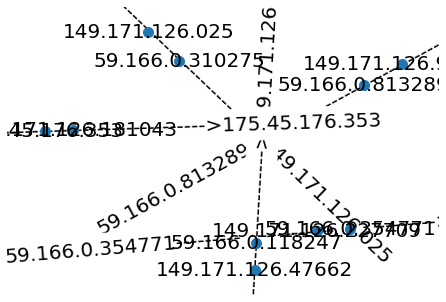

In [11]:
num_nodes_to_subsample = 10  # Adjust this number as needed

# Take the first 'num_nodes_to_subsample' nodes from the graph
subsampled_nodes = list(G.nodes())[:num_nodes_to_subsample]

# Extract the subgraph
subgraph = G.subgraph(subsampled_nodes)

# Visualize the subgraph
pos = nx.spring_layout(subgraph)  # You can use a different layout algorithm if needed

# Draw nodes
nx.draw(subgraph, pos, with_labels=True, node_size=100, font_size=20)

# Draw edges with labels
edge_labels = {(u, v): f"{u}------------------------------------>{v}" for u, v in subgraph.edges()}
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=20)

plt.show()

Convert to gephi format

In [12]:
# Specify the path for the GraphML file
graphml_file_path = "roughgraph.graphml"

# Export the graph to GraphML format
nx.write_graphml(G, graphml_file_path)

## Trying LSTM

In [7]:
#Train Test split
X = df.drop('Label', axis=1)
Y = df['Label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [8]:
#Create a new train dataframe from x_train and x_test
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)


In [10]:
import networkx as nx
# Create a directed graph
sampleG = nx.MultiDiGraph()

# Iterate through the dataset and add nodes and edges with attributes

for _, row in train.iterrows():
    source = row['srcip'] + str(row['sport'])
    target = row['dstip'] + str(row['dsport'])
    edge_attributes = {k: row[k] for k in df.columns if k not in ['srcip', 'dstip', 'sport', 'dsport']}
    
    # Add nodes and edges with attributes
    sampleG.add_node(source)
    sampleG.add_node(target)
    sampleG.add_edge(source, target, **edge_attributes)

In [15]:
#Sampling the dATASET
import random

# Randomly sample 10% of the df
sampled_df = df.sample(frac=0.01, random_state=1)

#Split train test
X = sampled_df.drop('Label', axis=1)
Y = sampled_df['Label']


In [30]:
Y

527437     0
1786610    0
1806763    0
386028     0
1762956    0
          ..
2296195    0
2032466    0
517329     0
1128037    0
1214044    1
Name: Label, Length: 25359, dtype: int64

In [16]:
X

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
527437,59.166.0.1,41142,149.171.126.8,53,udp,CON,0.000917,130,162,31,...,NaN,NaN,,2,2,3,10,1,1,2
1786610,59.166.0.0,16289,149.171.126.1,80,tcp,FIN,1.199940,1684,10168,31,...,1.0,0.0,0,2,3,4,2,1,1,1
1806763,59.166.0.6,9205,149.171.126.2,111,udp,CON,0.201180,568,312,31,...,0.0,0.0,0,12,4,1,1,1,1,1
386028,59.166.0.7,26710,149.171.126.2,24638,tcp,FIN,0.036484,2854,31402,31,...,NaN,NaN,,4,3,3,2,1,1,1
1762956,59.166.0.1,22910,149.171.126.5,12963,udp,CON,0.001623,528,304,31,...,0.0,0.0,0,13,6,2,4,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296195,59.166.0.7,31242,149.171.126.6,53,udp,CON,0.001083,146,178,31,...,NaN,NaN,,1,1,3,3,1,1,1
2032466,59.166.0.0,35110,149.171.126.5,41938,tcp,FIN,0.052695,4376,2560,31,...,0.0,0.0,0,10,11,4,4,1,1,3
517329,59.166.0.6,17093,149.171.126.7,53,udp,CON,0.001018,146,178,31,...,NaN,NaN,,3,1,1,2,1,1,1
1128037,59.166.0.8,54202,149.171.126.2,53,udp,CON,0.001035,146,178,31,...,NaN,NaN,,4,3,3,3,3,1,2


In [18]:
#Convert X,Y into adjacency matrix
import networkx as nx
# Create a directed graph
sampledG = nx.MultiDiGraph()

# Iterate through the dataset and add nodes and edges with attributes

for _, row in X.iterrows():
    source = row['srcip'] + str(row['sport'])
    target = row['dstip'] + str(row['dsport'])
    edge_attributes = {k: row[k] for k in X.columns if k not in ['srcip', 'dstip', 'sport', 'dsport']}
    
    # Add nodes and edges with attributes
    sampledG.add_node(source)
    sampledG.add_node(target)
    sampledG.add_edge(source, target, **edge_attributes)


In [37]:
num_features = len(X.columns) - 4


In [19]:
# Convert the graph to an adjacency matrix
adj_matrix = nx.to_pandas_adjacency(sampledG)
A = adj_matrix

In [31]:
#Convrt Y to a numpy array
y = Y.to_numpy()


In [33]:
y.shape

(25359,)

In [28]:
y=Y

In [26]:
A.shape

(28419, 28419)

In [35]:
#Number of nodes in the sampledG
max_nodes =len(sampledG.nodes)

In [39]:
#Use LSTM to predict label
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import roc_auc_score, f1_score

# Create a Keras LSTM model
model = Sequential([
    LSTM(64, input_shape=(None,max_nodes)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(A, y, epochs=10, batch_size=32, validation_split=0.2)




Epoch 1/10


ValueError: in user code:

    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_7' (type Sequential).
    
    Input 0 of layer "lstm_5" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 28419)
    
    Call arguments received by layer 'sequential_7' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28419), dtype=float64)
      • training=True
      • mask=None


Sample code taken from chatgpt

In [40]:
import numpy as np
import tensorflow as tf
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score

# Function to generate a random NetworkX graph with multiple edges
def generate_random_graph(num_nodes, num_edges):
    G = nx.DiGraph()
    nodes = range(num_nodes)
    G.add_nodes_from(nodes)
    for _ in range(num_edges):
        src = np.random.choice(nodes)
        dest = np.random.choice(nodes)
        if src != dest:
            packets = np.random.randint(1, 1000)
            avg_size = np.random.uniform(0.1, 1500)
            G.add_edge(src, dest, packets=packets, avg_size=avg_size)
    return G

# Generate sample dataset
num_samples = 1000
max_nodes = 10
max_edges = 20

X = []
y = []
for _ in range(num_samples):
    num_nodes = np.random.randint(2, max_nodes)
    num_edges = np.random.randint(1, max_edges)
    graph = generate_random_graph(num_nodes, num_edges)
    edges = list(graph.edges(data=True))
    for src, dest, data in edges:
        X.append([data['packets'], data['avg_size']])  # Edge attributes
        y.append(np.random.randint(2))  # Binary classification label (0 or 1)

# Convert lists to arrays
X = np.array(X)
y = np.array(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(2,), activation='relu'),  # Fully connected layer for edge attributes
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba).astype(int)

auc_score = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print("AUC Score:", auc_score)
print("F1 Score:", f1)


Epoch 1/10
119/119 [==============================] - 4s 14ms/step - loss: 14.4245 - accuracy: 0.4889 - val_loss: 0.9036 - val_accuracy: 0.4762
Epoch 2/10
119/119 [==============================] - 1s 7ms/step - loss: 0.9185 - accuracy: 0.5013 - val_loss: 0.7841 - val_accuracy: 0.4762
Epoch 3/10
119/119 [==============================] - 1s 10ms/step - loss: 0.8170 - accuracy: 0.4997 - val_loss: 0.7902 - val_accuracy: 0.4805
Epoch 4/10
119/119 [==============================] - 1s 6ms/step - loss: 0.8686 - accuracy: 0.5066 - val_loss: 0.7924 - val_accuracy: 0.4826
Epoch 5/10
119/119 [==============================] - 1s 6ms/step - loss: 0.9091 - accuracy: 0.4974 - val_loss: 1.6619 - val_accuracy: 0.5058
Epoch 6/10
119/119 [==============================] - 1s 5ms/step - loss: 0.8791 - accuracy: 0.5024 - val_loss: 1.0243 - val_accuracy: 0.5069
Epoch 7/10
119/119 [==============================] - 1s 5ms/step - loss: 0.8992 - accuracy: 0.5235 - val_loss: 0.7637 - val_accuracy: 0.4921
Epo

In [ ]:
#Sample the test
#Sampling the dATASET
import random

# Randomly sample 10% of the df
sampled_df = df.sample(frac=0.01, random_state=1)

#Split train test
X = sampled_df.drop('Label', axis=1)
Y = sampled_df['Label']

In [ ]:
# Evaluate the model
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba).astype(int)

auc_score = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print("AUC Score:", auc_score)
print("F1 Score:", f1)

In [ ]:
import numpy as np
import tensorflow as tf
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score



# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_nodes, 64, input_length=2),  # Embedding layer for nodes
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_attributes_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_proba = model.predict(X_attributes_test)
y_pred = np.round(y_pred_proba).astype(int)

auc_score = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print("AUC Score:", auc_score)
print("F1 Score:", f1)

## Trial: Tracking back the attack sequence

In [16]:
#Isolate records with Label = 1
dfAttack = df[df['Label']==1]
dfAttack

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
60,175.45.176.2,56052,149.171.126.12,4848,tcp,FIN,0.983451,962,268,254,...,,1,4,1,1,1,1,1,Exploits,1
61,175.45.176.0,65474,149.171.126.15,1723,tcp,FIN,0.918865,756,354,254,...,,7,4,1,1,1,1,4,Fuzzers,1
112,175.45.176.3,7727,149.171.126.12,80,tcp,FIN,1.020688,796,3804,62,...,,2,1,3,2,2,1,1,Exploits,1
113,175.45.176.0,35531,149.171.126.15,1723,tcp,FIN,0.801045,756,268,254,...,,7,4,1,3,1,1,4,Fuzzers,1
114,175.45.176.3,7727,149.171.126.12,80,tcp,FIN,1.020688,796,3804,62,...,,2,1,3,2,2,1,1,Exploits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540027,175.45.176.0,47439,149.171.126.10,53,udp,INT,0.000001,114,0,254,...,,15,15,15,15,15,15,15,Generic,1
2540028,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,...,,2,1,2,4,2,2,2,Exploits,1
2540029,175.45.176.0,33654,149.171.126.12,80,tcp,CON,2.579405,269883,1300,62,...,,2,1,2,4,2,2,2,DoS,1
2540030,175.45.176.0,33654,149.171.126.12,80,tcp,CON,2.579405,269883,1300,62,...,,1,1,2,4,2,2,2,DoS,1


In [7]:
#Finding srcip resposible for most attacks
dfAttack['srcip'].value_counts()

175.45.176.1    117908
175.45.176.3    106418
175.45.176.0     74279
175.45.176.2     22678
Name: srcip, dtype: int64

In [8]:
#Findind dstip involved in most attacks
dfAttack['dstip'].value_counts()

149.171.126.18    100187
149.171.126.15     46904
149.171.126.14     41826
149.171.126.10     40934
149.171.126.12     27782
149.171.126.17     22644
149.171.126.13     12643
149.171.126.19     12049
149.171.126.11      8886
149.171.126.16      7428
Name: dstip, dtype: int64

In [11]:
#Given dataset involves one attacker attacking one victim, and the victim attacks other nodes in the network. Traceback the attacker with respect to the time of attack.
#Finding the time of first attack
dfAttack['Stime'].min()



1421927414

In [12]:
# Function to track down attack sequence
def track_attack_sequence(df):
    infected_nodes = set()
    attack_sequence = []

    # Sort dataframe by time in reverse order
    df = df.sort_values(by='Stime', ascending=False)

    for _, row in df.iterrows():
        source = row['srcip']
        target = row['dstip']
        time = row['Stime']
        attack = row['Label']

        if attack:
            infected_nodes.add(source)
            if target not in infected_nodes:
                attack_sequence.insert(0, (time, source, target))
                infected_nodes.add(target)

    return attack_sequence

# Run the function
attack_sequence = track_attack_sequence(dfAttack)

# Print the attack sequence
print("Attack Sequence:")
for time, source, target in attack_sequence:
    print(f"At time {time}, {source} attacked {target}")

# Identify the first infected nodes
first_infected_nodes = set([attack_sequence[0][1], attack_sequence[0][2]])

print("\nFirst Infected Nodes:")
for node in first_infected_nodes:
    print(node)


Attack Sequence:
At time 1424262020, 175.45.176.1 attacked 149.171.126.14
At time 1424262052, 175.45.176.0 attacked 149.171.126.11
At time 1424262053, 175.45.176.3 attacked 149.171.126.19
At time 1424262054, 175.45.176.0 attacked 149.171.126.16
At time 1424262061, 175.45.176.2 attacked 149.171.126.13
At time 1424262066, 175.45.176.0 attacked 149.171.126.12
At time 1424262067, 175.45.176.2 attacked 149.171.126.18
At time 1424262067, 175.45.176.3 attacked 149.171.126.15
At time 1424262068, 175.45.176.0 attacked 149.171.126.10
At time 1424262068, 175.45.176.0 attacked 149.171.126.17

First Infected Nodes:
175.45.176.1
149.171.126.14


Attack graph trace only with attack records

In [17]:
attackG = nx.DiGraph()

# Add edges from the dataframe
dfAttack.sort_values(by='Stime', ascending=True, inplace=True)
for _, row in dfAttack.iterrows():
    source = row['srcip']
    target = row['dstip']
    time = row['Stime']
    attack = row['Label']

    if attack:
        attackG.add_edge(source, target)

# Function to trace attack sequences
def trace_attack_sequences(graph):
    attack_sequences = []
    for node in graph.nodes():
        predecessors = list(nx.ancestors(graph, node))
        if not predecessors:
            attack_sequences.append([node])
        else:
            for sequence in attack_sequences:
                if sequence[-1] in predecessors:
                    sequence.append(node)
    return attack_sequences

# Run the function
sequences = trace_attack_sequences(attackG)

# Print the attack sequences
print("Attack Sequences:")
for sequence in sequences:
    print(" -> ".join(sequence))

C:\Users\sathi\AppData\Local\Temp\ipykernel_15660\1240168761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAttack.sort_values(by='Stime', ascending=True, inplace=True)


Attack Sequences:
175.45.176.0 -> 149.171.126.16
175.45.176.3 -> 149.171.126.18
175.45.176.2 -> 149.171.126.10
175.45.176.1 -> 149.171.126.11


Attack graph trace with all records (Including potential compromises, includes time related information)

In [ ]:
attackGfull = nx.DiGraph()
# Sort dataframe by time in ascending order
df.sort_values(by='Stime', inplace=True)
#Retain only srcip dstip Stime and Label columns
dfShort = df[['srcip', 'dstip', 'Stime', 'Label']]
# Add edges from the dataframe
compromised_nodes = set()
attacknodes = []
for _, row in dfShort.iterrows():
    source = row['srcip']
    target = row['dstip']
    time = row['Stime']
    attack = row['Label']

    if attack:
        compromised_nodes.add(source)
        compromised_nodes.add(target)
        attackGfull.add_edge(source, target, time=time)

for _, row in dfAttack.iterrows():
    source = row['srcip']
    target = row['dstip']
    time = row['Stime']
    attack = row['Label']

    if attack:
        attackG.add_edge(source, target)

# Function to trace attack sequences
def trace_attack_sequences(graph):
    attack_sequences = []
    for node in graph.nodes():
        predecessors = list(nx.ancestors(graph, node))
        if not predecessors:
            attack_sequences.append([node])
        else:
            for sequence in attack_sequences:
                if sequence[-1] in predecessors:
                    sequence.append(node)
    return attack_sequences

# Run the function
sequences = trace_attack_sequences(attackG)

# Print the attack sequences
print("Attack Sequences:")
for sequence in sequences:
    print(" -> ".join(sequence))

In [6]:
attackG1 = nx.DiGraph()

# Sort dataframe by time in ascending order
df.sort_values(by='Stime', inplace=True)
#Retain only srcip dstip Stime and Label columns
dfShort = df[['srcip', 'dstip', 'Stime', 'Label']]

# Add edges from the dataframe based on compromise time
compromised_nodes = set()
for _, row in dfShort.iterrows():
    source = row['srcip']
    target = row['dstip']
    time = row['Stime']
    attack = row['Label']

    if attack:
        compromised_nodes.add(source)
        compromised_nodes.add(target)
        attackG1.add_edge(source, target, time=time)

# Create a subgraph of safe interactions (before compromise time)
safe_edges = [(edge[0], edge[1]) for edge in attackG1.edges() if attackG1[edge[0]][edge[1]]['time'] < dfShort['Stime'].min()]
safe_attackG = attackG1.edge_subgraph(safe_edges)

# Print the safe interactions
print("Safe Interactions:")
for edge in safe_attackG.edges(data=True):
    print(f"{edge[0]} -> {edge[1]}, Time: {edge[2]['time']}")

C:\Users\sathi\AppData\Local\Temp\ipykernel_19248\3791880205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Stime', inplace=True)


Safe Interactions:
